In [1]:
import os
import datetime
from gensim.models import Word2Vec as w2v
import matplotlib.pyplot as plt



models = {}
for filename in os.listdir('w2v_models_journals'):
        file_path = os.path.join('w2v_models_journals', filename)
        models[filename] = w2v.load(file_path)


In [3]:
reddit_model = w2v.load('models/model_total')

In [6]:
models['reddit_model'] = reddit_model

In [8]:
models.pop('Word2Vec(vocab=46168, vector_size=100, alpha=0.025)')

In [9]:
models

{'aljazeera_word2vec.model': <gensim.models.word2vec.Word2Vec at 0x191bee4f070>,
 'guardian_word2vec.model': <gensim.models.word2vec.Word2Vec at 0x191bee4f250>,
 'nytimes_word2vec.model': <gensim.models.word2vec.Word2Vec at 0x191da7aae50>,
 'reddit_model': <gensim.models.word2vec.Word2Vec at 0x191bee4f3d0>}

In [23]:
import datetime

models = dict(sorted(models.items(), key=lambda item: datetime.datetime.strptime(item[0], '%Y-%B')))


In [24]:
models

{'2023-October': <gensim.models.word2vec.Word2Vec at 0x22fdb2f2430>,
 '2023-November': <gensim.models.word2vec.Word2Vec at 0x22fdb73e130>,
 '2023-December': <gensim.models.word2vec.Word2Vec at 0x22fdaf33160>,
 '2024-January': <gensim.models.word2vec.Word2Vec at 0x22fdc766e20>,
 '2024-February': <gensim.models.word2vec.Word2Vec at 0x22fdb11f310>,
 '2024-March': <gensim.models.word2vec.Word2Vec at 0x22fdc766e80>,
 '2024-April': <gensim.models.word2vec.Word2Vec at 0x22fd5beb3d0>}

In [25]:
word_pairs = [
    ('hamas', 'terrorist'),
    ('israel', 'selfdefence'),
    ('palestine', 'selfdefence'),
    ('israel', 'genocide'),
    ('israel', 'ceasefire'), 
]

result = {pair: [] for pair in word_pairs}

for pair in word_pairs:
    result[pair] = model_total.wv.similarity(*pair)
    print(f'Similarity: {pair[0]} vs {pair[1]} is {model_total.wv.similarity(*pair)}')

Similarity: hamas vs terrorist is 0.5636658072471619
Similarity: israel vs selfdefence is 0.2512640655040741
Similarity: palestine vs selfdefence is 0.05797537416219711
Similarity: israel vs genocide is 0.14960508048534393
Similarity: israel vs ceasefire is 0.2447299063205719


In [26]:
result

{('hamas', 'terrorist'): 0.5636658,
 ('israel', 'selfdefence'): 0.25126407,
 ('palestine', 'selfdefence'): 0.057975374,
 ('israel', 'genocide'): 0.14960508,
 ('israel', 'ceasefire'): 0.2447299}

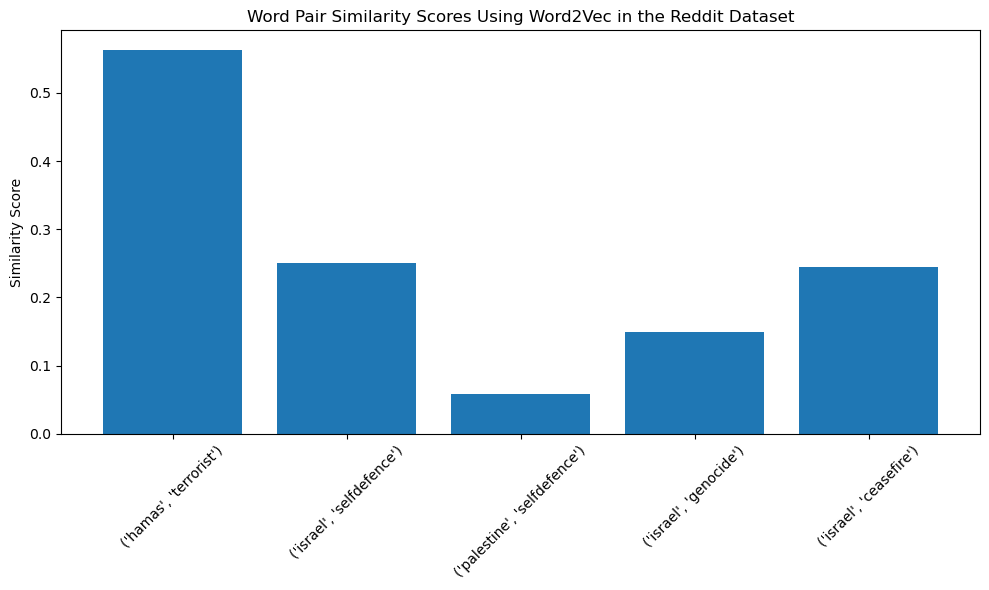

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)), list(result.keys()), rotation=45)
plt.ylabel('Similarity Score')
plt.title('Word Pair Similarity Scores Using Word2Vec in the Reddit Dataset')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

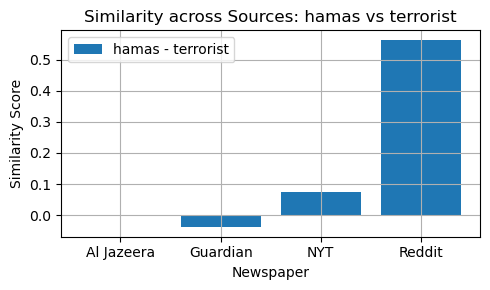

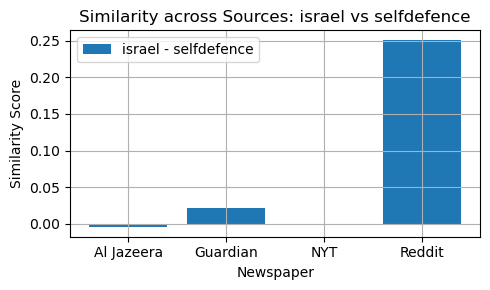

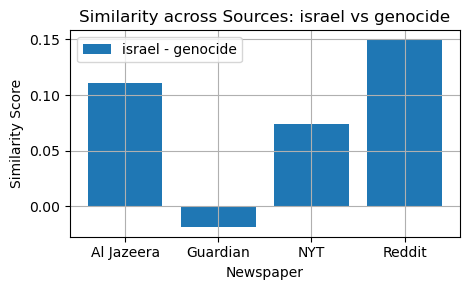

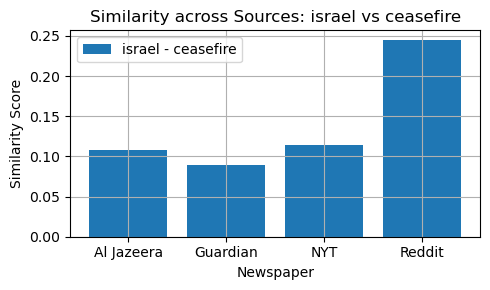

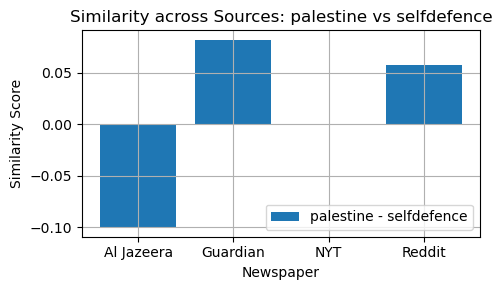

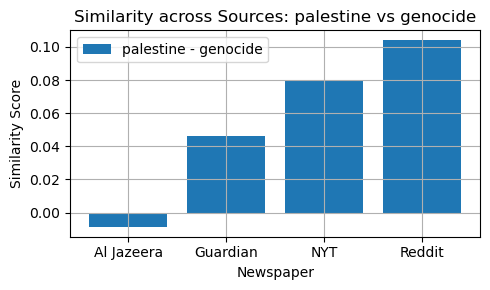

In [18]:
from datetime import datetime

# Given dictionary of Word2Vec models
# Define word pairs


word_pairs = [
    ('hamas', 'terrorist'),
    ('israel', 'selfdefence'),
    ('israel', 'genocide'),
    ('israel', 'ceasefire'), 
    ('palestine', 'selfdefence'),
    ('palestine', 'genocide')
]

# Initialize a dictionary to hold results
results = {pair: [] for pair in word_pairs}

# Compute similarities
for newspaper, model in models.items():
    for pair in word_pairs:
        # Check if both words are in the model's vocabulary
        try:
            similarity = model.wv.similarity(*pair)
        except:
            similarity = 0  # Output 0 if either word is missing
        results[pair].append(similarity)

# Plotting - creating a separate plot for each pair
for pair, similarities in results.items():
    plt.figure(figsize=(5, 3))
    plt.bar(['Al Jazeera' , 'Guardian' , 'NYT' , 'Reddit'], similarities, label=f'{pair[0]} - {pair[1]}', align='center')
    plt.title(f'Similarity across Sources: {pair[0]} vs {pair[1]}')
    plt.xlabel('Newspaper')
    plt.ylabel('Similarity Score')
    plt.legend()
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.grid(True)
    plt.show()

